# Imputation of Missing Monthly Precipitation Data Using Linear Regression: A Comprehensive Case Study of Lake Urmia Basin's Stations Based on **Proximity**, **Data Coverage**, and **Correlation**  

## Abstract

The imputation of missing meteorological data is a common challenge in environmental research, particularly in regions with sparse weather stations or incomplete historical records. This study presents a method for imputing missing monthly precipitation data in the Lake Urmia region, a semi-arid area in northwest Iran, using linear regression. The approach focuses on identifying a suitable station for imputation based on three criteria: proximity, coverage of missing data, and statistical correlation between stations. 

The methodology involves the following steps:

1. **Station Selection**: For each station with missing precipitation data, the nearest stations are identified based on their Euclidean distance (in kilometers). This helps ensure that the imputation model uses data from geographically relevant stations.

2. **Coverage Check**: The availability of precipitation data at the candidate station during the period of missing data is verified. Only stations with sufficient coverage for the missing timeframes are considered suitable for imputation.

3. **Correlation Analysis**: A correlation matrix is used to assess the strength of the relationship between precipitation records of the candidate station and the station with missing data. Only stations with a high correlation (above a predefined threshold) are selected for imputation.

4. **Linear Regression Imputation**: Once a suitable station is identified, a linear regression model is built using data from both the station with missing data and the selected station. The model is trained to predict the missing precipitation values, which are then used to fill the gaps in the original dataset.

5. **Evaluation**: The imputation process is evaluated using standard performance metrics, such as R², RMSE, and MAE, to assess the quality of the imputed values.

This method offers an efficient and scientifically grounded way to handle missing meteorological data in the Lake Urmia region, supporting more accurate hydrological modeling, water resource management, and climate studies in the area. The results also highlight the potential of combining spatial proximity, data coverage, and statistical relationships in selecting the most appropriate reference stations for data imputation.
or further analyfacilitates

This approach helps fill missing precipitation values efficiently while considering both spatial proximity and statistical similarity, ensuring the imputed data is as accurate as possible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your Excel file
file_path = 'F:/precip/precip/paper/final_filtered_data33.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)



In [2]:
df

,station,precipitation,Date,X,Y,Elevation
0,19-936,NaN,136801,708023.0,4222144.0,1956
1,19-936,NaN,136802,708023.0,4222144.0,1956
2,19-936,NaN,136803,708023.0,4222144.0,1956
3,19-936,NaN,136804,708023.0,4222144.0,1956
4,19-936,NaN,136805,708023.0,4222144.0,1956
...,...,...,...,...,...,...
56371,38-984,13.4,139608,554465.0,4230516.0,1415
56372,38-984,23.0,139609,554465.0,4230516.0,1415
56373,38-984,13.1,139610,554465.0,4230516.0,1415
56374,38-984,71.6,139611,554465.0,4230516.0,1415


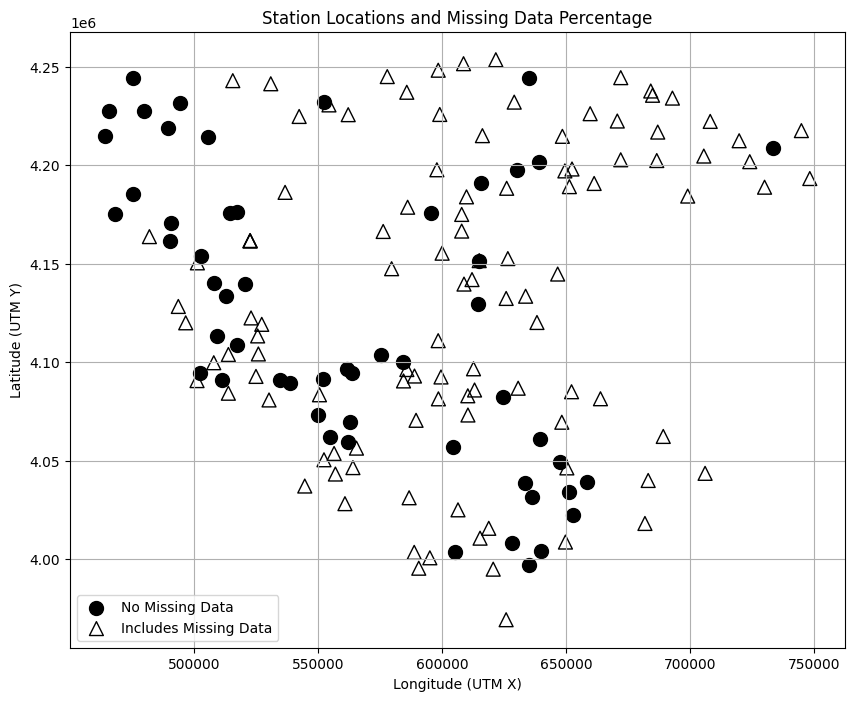

In [4]:
# Convert the 'Date' column to numeric if it is not already
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

# Define the date range of interest
start_date = 136801
end_date = 139612

# Filter the dataframe by the specified date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group by 'station' and calculate the percentage of missing data for each station
station_missing_percentage = filtered_df.groupby('station')['precipitation'].apply(lambda x: x.isnull().mean() * 100)

# Get the coordinates for each station
station_coords = filtered_df.groupby('station').agg({'X': 'first', 'Y': 'first'}).reset_index()

# Merge the missing data percentage with the station coordinates
station_data = station_coords.merge(station_missing_percentage, on='station')

# Rename columns for clarity
station_data.columns = ['station', 'X', 'Y', 'Missing Data Percentage']

# Plotting
plt.figure(figsize=(10, 8))

# Plot stations with no missing data
no_missing_stations = station_data[station_data['Missing Data Percentage'] == 0]
plt.scatter(no_missing_stations['X'], no_missing_stations['Y'], 
            marker='o', edgecolors='black', facecolors='black', s=100, label='No Missing Data')

# Plot other stations (with missing data <= 50% but > 0%)
other_stations = station_data[(station_data['Missing Data Percentage'] > 0) & 
                              (station_data['Missing Data Percentage'] <= 50)]
plt.scatter(other_stations['X'], other_stations['Y'], 
            marker='^', edgecolors='black', facecolors='none', s=100, label='Includes Missing Data')

# Add labels and title
plt.xlabel('Longitude (UTM X)')
plt.ylabel('Latitude (UTM Y)')
plt.title('Station Locations and Missing Data Percentage')
plt.legend(loc='lower left')

# Display the plot
plt.grid(True)
plt.show()

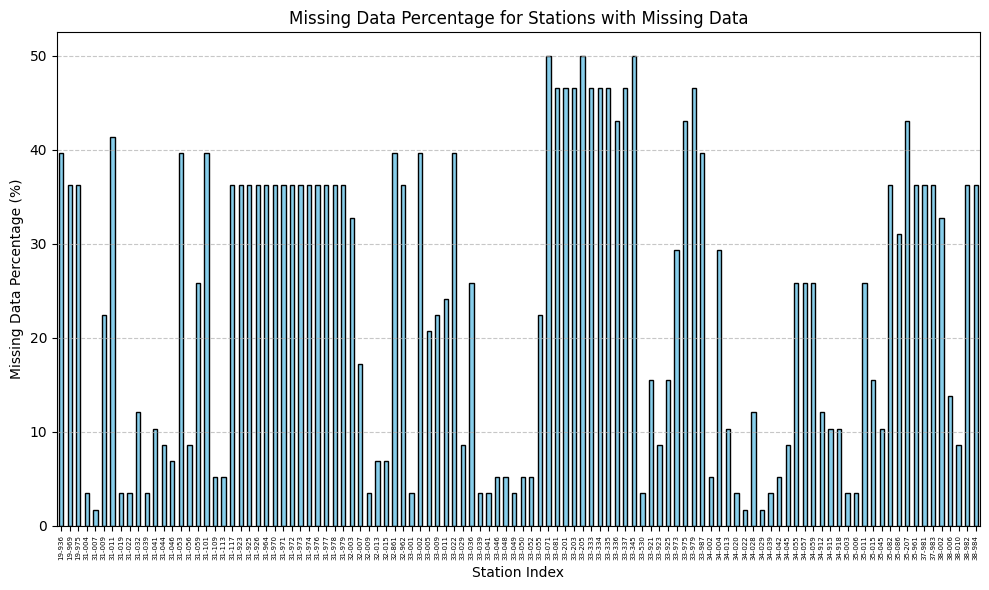

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to numeric if it is not already
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

# Define the date range of interest
start_date = 136801
end_date = 139612

# Filter the dataframe by the specified date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group by 'station' and calculate the percentage of missing data for each station
station_missing_percentage = filtered_df.groupby('station')['precipitation'].apply(lambda x: x.isnull().mean() * 100)

# Filter out stations with no missing data
stations_with_missing_data = station_missing_percentage[station_missing_percentage > 0]

# Plotting a bar chart for the missing data percentages
plt.figure(figsize=(10, 6))

# Plotting the bar chart
stations_with_missing_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Station Index')
plt.ylabel('Missing Data Percentage (%)')
plt.title('Missing Data Percentage for Stations with Missing Data')

# Setting the x-axis to be the row numbers (index of stations)
plt.xticks(ticks=range(len(stations_with_missing_data)), labels=stations_with_missing_data.index, rotation=90, fontsize=5)

# Display the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


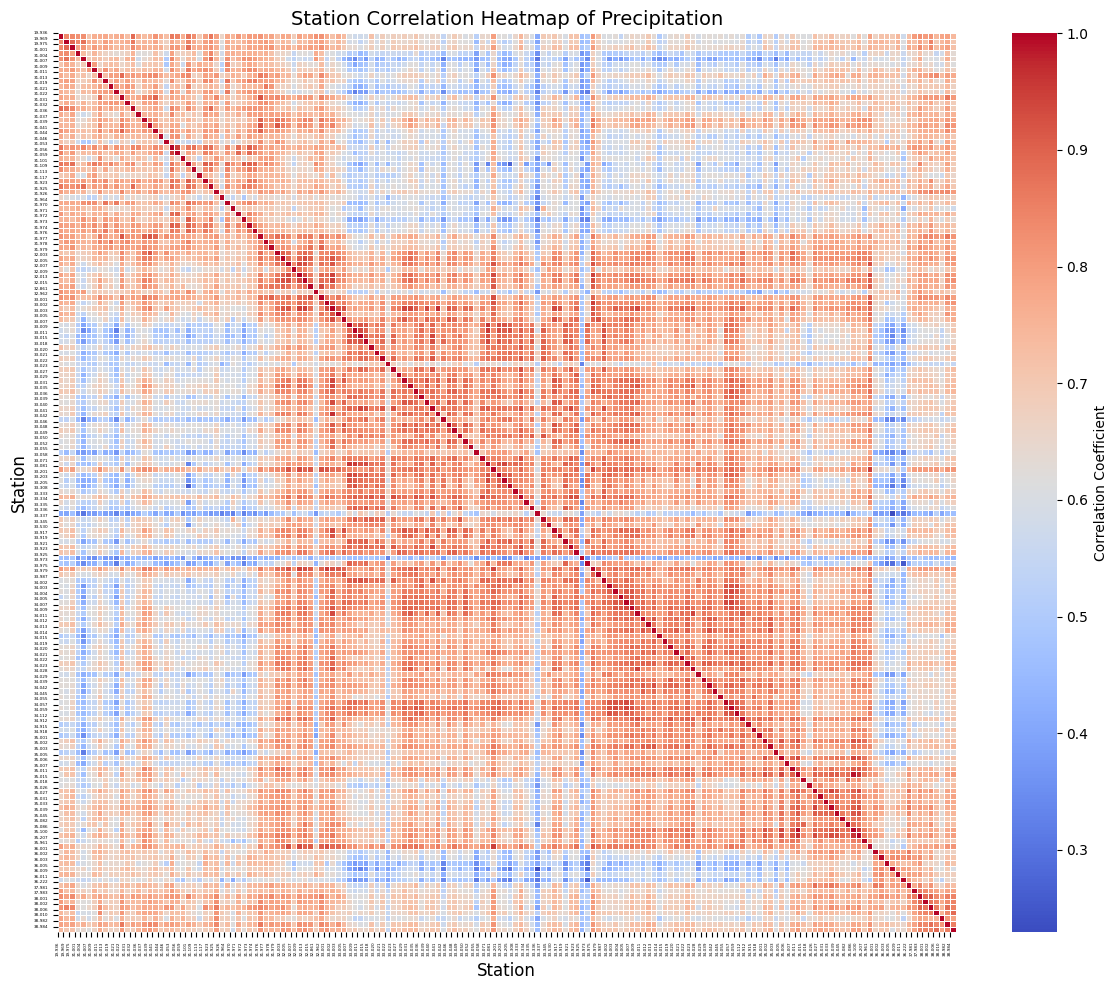

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Date' column to numeric if it is not already
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

# Define the date range of interest
start_date = 136801
end_date = 139612

# Filter the dataframe by the specified date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Pivot the data to have stations as columns and dates as rows
pivoted_df = filtered_df.pivot_table(index='Date', columns='station', values='precipitation')

# Calculate the correlation matrix
correlation_matrix = pivoted_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

# Adjust the font size of x and y axis ticks
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, fontsize=3, rotation=90) 
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, fontsize=3)  

# Adding title and labels
plt.title('Station Correlation Heatmap of Precipitation', fontsize=14)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Station', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Path to your Excel file
file_path = 'F:/precip/precip/paper/final_filtered_data33.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Define the date range of interest
start_date = 136801
end_date = 139612

# Pivot the DataFrame to get stations as columns and Date as index
pivot_df = df.pivot(index='Date', columns='station', values='precipitation')

# Convert 'Date' to numeric if it's not already
pivot_df.index = pd.to_numeric(pivot_df.index, errors='coerce')

# Filter the data by the specified date range
filtered_df = pivot_df[(pivot_df.index >= start_date) & (pivot_df.index <= end_date)]

# Identify stations with missing data
missing_data_stations = filtered_df.columns[filtered_df.isna().any()].tolist()

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Extract location coordinates
locations = df[['station', 'X', 'Y']].drop_duplicates().set_index('station')

# Calculate Euclidean distances between stations
def calculate_distances(locations):
    coords = locations[['X', 'Y']].values
    distances = cdist(coords, coords, metric='euclidean')
    return distances

# Convert distances to kilometers (assuming UTM coordinates in meters)
def convert_to_kilometers(distances):
    return distances / 1000

# Rank distances
def rank_distances(distances):
    distance_ranking = np.argsort(distances, axis=1)
    return distance_ranking

# Calculate, convert, and rank distances
distances = calculate_distances(locations)
distances_km = convert_to_kilometers(distances)
distance_ranking = rank_distances(distances)

# Initialize a DataFrame to store the entire output
output_df = pd.DataFrame(columns=['Station', 'Suitable Station', 'R²', 'RMSE', 'MAE', 'Equation'])

# Function to impute missing data using Linear Regression
def impute_missing_data():
    print("Station | Suitable Station | R² | RMSE | MAE | Equation")
    print("-" * 80)
    for station in missing_data_stations:
        station_index = locations.index.get_loc(station)
        found_suitable_station = False

        for nearest_rank in range(len(distance_ranking[station_index])):
            nearest_index = distance_ranking[station_index][nearest_rank]
            nearest_station = locations.index[nearest_index]
            
            if nearest_station != station:
                # Check if the nearest station can cover the missing data
                missing_dates = filtered_df[station].isna()
                coverage = not filtered_df.loc[missing_dates, nearest_station].isna().any()
                
                if coverage:
                    # Prepare data for linear regression
                    valid_data = filtered_df[[station, nearest_station]].dropna()
                    X = valid_data[[nearest_station]].values  # Independent variable
                    y = valid_data[station].values  # Dependent variable

                    # Perform Linear Regression
                    model = LinearRegression()
                    model.fit(X, y)

                    # Predict missing values for the station
                    X_missing = filtered_df.loc[missing_dates, nearest_station].values.reshape(-1, 1)
                    y_pred = model.predict(X_missing)

                    # Fill missing values with the predicted data
                    filtered_df.loc[missing_dates, station] = y_pred

                    # Evaluate the model
                    y_true = y
                    y_train_pred = model.predict(X)
                    r2 = r2_score(y_true, y_train_pred)
                    rmse = np.sqrt(mean_squared_error(y_true, y_train_pred))
                    mae = mean_absolute_error(y_true, y_train_pred)

                    # Get the equation of the line (slope and intercept)
                    slope = model.coef_[0]
                    intercept = model.intercept_
                    equation = f"y = {slope:.4f} * x + {intercept:.4f}"

                    # Print the evaluation metrics and the equation
                    print(f"{station} | {nearest_station} | {r2:.4f} | {rmse:.4f} | {mae:.4f} | {equation}")

                    # Append the result to the output DataFrame
                    output_df.loc[len(output_df)] = [station, nearest_station, r2, rmse, mae, equation]

                    found_suitable_station = True
                    break

        if not found_suitable_station:
            print(f"{station} | No suitable station found")
            output_df.loc[len(output_df)] = [station, "No suitable station", None, None, None, None]

# Call the function to impute missing data and evaluate
impute_missing_data()

# Save the output DataFrame to an Excel file
output_file_path = 'F:/precip/precip/paper/imputation_results.xlsx'
output_df.to_excel(output_file_path, index=False)

Station | Suitable Station | R² | RMSE | MAE | Equation
--------------------------------------------------------------------------------
19-936 | 31-001 | 0.6736 | 17.9739 | 13.2821 | y = 1.1127 * x + 5.6852
19-969 | 31-001 | 0.6982 | 12.8480 | 9.1428 | y = 0.8523 * x + 3.8221
19-975 | 19-969 | 0.7916 | 14.0717 | 10.3333 | y = 1.1725 * x + 5.1281
31-004 | 31-032 | 0.5758 | 11.5010 | 7.4507 | y = 0.4674 * x + 1.5756
31-007 | 31-101 | 0.6616 | 13.3747 | 9.4984 | y = 0.6771 * x + 1.8851
31-009 | 31-101 | 0.7329 | 13.6476 | 9.6611 | y = 0.7944 * x + 2.1695
31-011 | 31-036 | 0.6134 | 15.6257 | 10.4368 | y = 0.7933 * x + 4.4438
31-019 | 31-021 | 0.6547 | 14.9861 | 11.0637 | y = 0.9312 * x + 8.6732
31-022 | 38-982 | 0.7491 | 11.5349 | 7.8211 | y = 0.8209 * x + 1.3189
31-032 | 31-004 | 0.5815 | 18.3932 | 12.6466 | y = 1.2441 * x + 10.6168
31-039 | 31-037 | 0.6981 | 12.6642 | 8.3285 | y = 0.7526 * x + 1.9292
31-041 | 31-022 | 0.8091 | 8.7406 | 6.3363 | y = 0.8137 * x + 2.3752
31-044 | 31-036 | 